# Lab1 Crime Pattern Analysis

---

In this lab, you will use the Atlanta neighborhood shapefile and crime_data2023 to analyze crime patterns across the city.

Atlanta is a city with relatively high crime rates, making safety a critical issue for residents. Crime patterns can vary widely across neighborhoods, impacting how secure people feel in different parts of the city. Understanding these patterns is key to identifying high-risk areas and developing strategies to enhance public safety.

The crime data used in this lab is sourced from the [Atlanta Police Department's open data portal](https://opendata.atlantapd.org/). It includes detailed information such as crime type, geographic coordinates, victim count, time of occurrence, and other relevant details.


### Icons Used in This Notebook

🔔 **Question**: A quick question to help you understand better.<br>
🥊 **Challenge**: Interactive exercise.<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
📖 **Documentation**: Links to official documentation or additional reading materials to deepen your understanding.<br>


## 1. Setup, Data Loading and Basic Data Visualization


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

When working with geospatial data in Python, the GeoPandas library provides convenient tools for reading, analyzing, and visualizing such data.

💡 **Tip**: To begin, ensure that GeoPandas is installed in your environment.
If it's not installed, you can add it using pip:

```bash
    pip install geopandas
```


In [2]:
# Load the GeoJSON file
crime_data = gpd.read_file("crime_data2023/crime_data2023.geojson")

By printing `type(crime_data)`, you can confirm that the data has been loaded as a GeoDataFrame.


In [3]:
type(crime_data)

geopandas.geodataframe.GeoDataFrame

By using `crime_data.head()`, you can view the first few rows of the dataset, which helps in understanding its structure and the information it contains.


In [4]:
crime_data.head()

,OBJECTID,report_number,report_Date,offense_start_date,offense_end_date,Day_of_the_week,Day_Number,Zone,Beat,location,...,e2,long,lat,NhoodName,NPU,DISTRICT,UCR_Grouping,victim_count,GlobalID,geometry
0,1160956,230142167,"Sun, 15 Jan 2023 03:58:43 GMT","Sun, 15 Jan 2023 01:20:00 GMT","Sun, 15 Jan 2023 03:00:00 GMT",Saturday,7,1,111,3335 MARTIN L KING JR DR NW,...,Evening Watch,-84.497429,33.754549,Adamsville,H,10.0,Part I,1.0,723e1e6c-5904-4528-99bf-32024721397b,POINT (-84.49743 33.75455)
1,1160957,230150068,"Sun, 15 Jan 2023 05:10:55 GMT","Sun, 15 Jan 2023 04:00:00 GMT","Sun, 15 Jan 2023 05:11:00 GMT",Sunday,1,3,305,1695 PRYOR RD SW,...,Morning Watch,-84.393743,33.708939,Betmar LaVilla,Y,12.0,Part I,NaN,a08d5d90-c61c-46bb-a463-71cf958609c0,POINT (-84.39374 33.70894)
2,1160958,230150448,"Sun, 15 Jan 2023 10:34:18 GMT","Sun, 15 Jan 2023 08:15:00 GMT","Sun, 15 Jan 2023 09:23:00 GMT",Sunday,1,1,102,117 JOSEPH E LOWERY BLVD NW,...,Morning Watch,-84.417334,33.758002,Vine City,L,3.0,Part I,1.0,b639b830-9859-4e25-af8a-8b800ab87dcf,POINT (-84.41733 33.758)
3,1160959,230171812,"Wed, 18 Jan 2023 01:17:23 GMT","Tue, 17 Jan 2023 23:31:00 GMT","Wed, 18 Jan 2023 01:17:00 GMT",Tuesday,3,5,507,74 NORTHSIDE DR SW,...,Evening Watch,-84.402518,33.752672,Castleberry Hill,M,3.0,Part I,1.0,29ebc0dc-6e1c-46b8-9483-5544d89d7d46,POINT (-84.40252 33.75267)
4,1160960,230178100,"Wed, 18 Jan 2023 04:01:52 GMT","Wed, 18 Jan 2023 01:37:00 GMT","Wed, 18 Jan 2023 04:00:00 GMT",Tuesday,3,7,703,11700 SPINE RD,...,Evening Watch,-84.429698,33.637475,None,None,NaN,Part II,2.0,2590a727-e640-4891-b27b-0f1258c8fa47,POINT (-84.4297 33.63748)


In [5]:
crime_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42501 entries, 0 to 42500
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   OBJECTID              42501 non-null  int32   
 1   report_number         42501 non-null  object  
 2   report_Date           42501 non-null  object  
 3   offense_start_date    42355 non-null  object  
 4   offense_end_date      41464 non-null  object  
 5   Day_of_the_week       42501 non-null  object  
 6   Day_Number            42501 non-null  int32   
 7   Zone                  42501 non-null  int32   
 8   Beat                  42487 non-null  object  
 9   location              42500 non-null  object  
 10  location_type         42500 non-null  object  
 11  nibrs_code            42501 non-null  object  
 12  nibrs_code_name       42501 non-null  object  
 13  nibrs_crime_against   42501 non-null  object  
 14  was_firearm_invloved  42501 non-null  object  

💡 **Tip**: The `nibrs_code_name` attribute represents the type of crime associated with each record. The National Incident-Based Reporting System (NIBRS) categorizes offenses into specific codes, each corresponding to a particular crime type, represented by `nibrs_code`.


To determine the number of unique crime names in the dataset and their respective counts, you can utilize the `unique()` and `value_counts()` methods from the pandas library.


In [6]:
unique_crime_names = crime_data["nibrs_code_name"].unique()

print("Unique Crime Names:")
print(unique_crime_names.tolist())

Unique Crime Names:
['Theft From Motor Vehicle', 'Shoplifting', 'Robbery', 'Aggravated Assault', 'Simple Assault', 'Destruction/Damage/Vandalism of Property', 'Burglary/Breaking & Entering', 'Credit Card/Automated Teller Machine Fraud', 'Animal Cruelty', 'Motor Vehicle Theft', 'Theft From Building', 'All Other Larceny', 'Drug/Narcotic Violations', 'Impersonation', 'Arson', 'False Pretenses/Swindle/Confidence Game', 'Drug Equipment Violations', 'Weapon Law Violations', 'Intimidation', 'Stolen Property Offenses', 'Embezzlement', 'Counterfeiting/Forgery', 'Identity Theft', 'Theft of Motor Vehicle Parts or Accessories', 'Murder & Nonnegligent Manslaughter', 'Wire Fraud', 'Sodomy', 'Rape', 'Fondling', 'Purse-snatching', 'Extortion/Blackmail', 'Kidnapping/Abduction', 'Operating/Promoting/Assisting Gambling', 'Pornography/Obscene Material', 'Welfare Fraud', 'Theft From Coin-Operated Machine or Device', 'Pocket-picking', 'Sexual Assault With An Object', 'Hacking/Computer Invasion', 'Statutory 

In [7]:
crimes_frequency = crime_data['nibrs_code_name'].value_counts()

To visualize the unique crime names and their respective counts from the dataset as a word cloud, you can utilize the `WordCloud` class from the `wordcloud` library in Python.


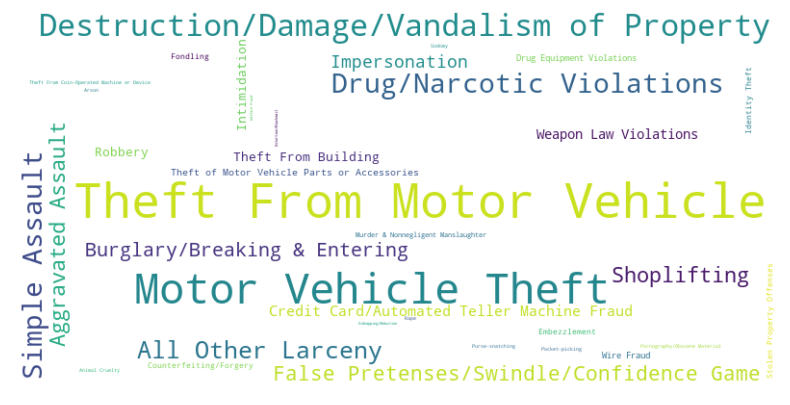

In [8]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(crimes_frequency.to_dict())

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

You can apply similar methods to analyze other columns such as `location_type`, `victim_count`, and `nibris_crime_against`.


In [9]:
unique_location_types = crime_data["location_type"].unique()
print("Unique Location Types:")
print(unique_location_types.tolist())

unique_victim_counts = crime_data["victim_count"].unique()
print("Unique Victim Counts:")
print(unique_victim_counts.tolist())

unique_crime_against = crime_data["nibrs_crime_against"].unique()
print("Unique Crimes Against:")
print(unique_crime_against.tolist())

Unique Location Types:
['Other/Unknown', 'Convenience Store', 'Residence/ Home / Apartment / Condo', 'Air/ Bus/ Train Terminal', 'Parking/ Drop Lot/ Garage', 'ATM Separate From Bank', 'Highway/ Road/ Alley/ Street/ Sidewalk', 'Shopping Mall', 'Construction Site', 'Restaurant', 'Cyberspace', 'Department/ Discount/ Store', 'Bar/ Nightclub', 'Commercial/ Office Building', 'Auto Dealership New/Used', 'Liquor Store', 'Park/ Playground', 'Community Center', 'Service/ Gas Station', 'Specialty Store', 'Government/ Public Building', 'Abandoned/ Condemned Structure', 'Bank - Savings and Loan', 'Hotel/ Motel/ Etc.', 'Rental Storage Facility', 'Grocery/ Supermarket', 'Church/ Synagogue/ Temple/ Mosque', 'School - Elementary/ Secondary', 'Shelter - Mission/ Homeless', 'School/ College', 'Industrial Site', 'Amusement Park', 'School - College/ University', 'Arena/ Stadium/ Fairgrounds/ Coliseum', "Drug Store/ Doctor's Office/ Hospital", 'Jail/Prison/Penitentiary/Corrections Facility', 'Field/ Woods',

To visualize the distribution of crimes across different days of the week, you can use Seaborn's `countplot` function.


**Documentation**:

- 📖 [Seaborn countplot Documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html)


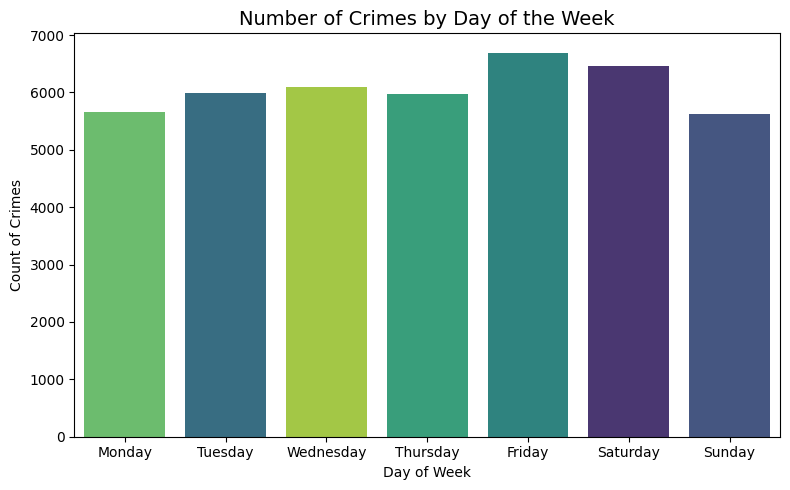

In [10]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(8, 5))
sns.countplot(data=crime_data, x='Day_of_the_week', order=day_order, hue='Day_of_the_week', palette="viridis")
plt.title("Number of Crimes by Day of the Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Count of Crimes")
plt.tight_layout()
plt.show()

To analyze the distribution of crimes by hour of the day, follow these steps:


1. Convert the `offense_start_date` column to datetime format:


In [11]:
crime_data['offense_start_date'] = pd.to_datetime(crime_data['offense_start_date'])
crime_data['offense_start_date'].head()

0   2023-01-15 01:20:00
1   2023-01-15 04:00:00
2   2023-01-15 08:15:00
3   2023-01-17 23:31:00
4   2023-01-18 01:37:00
Name: offense_start_date, dtype: datetime64[ns]

2. Extract the hour from the `offense_start_date`:


In [12]:
crime_data['Hour'] = crime_data['offense_start_date'].dt.hour
crime_data['Hour'].head()

0     1.0
1     4.0
2     8.0
3    23.0
4     1.0
Name: Hour, dtype: float64

3. Calculate the number of crimes for each hour:


In [13]:
hourly_counts = crime_data.groupby('Hour').size().reset_index(name='Counts')
hourly_counts.head()

,Hour,Counts
0,0.0,2453
1,1.0,2110
2,2.0,2169
3,3.0,1926
4,4.0,2750


4. Visualize the data using a line plot:


**Documentation**:

- 📖 [Seaborn linelot Documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)


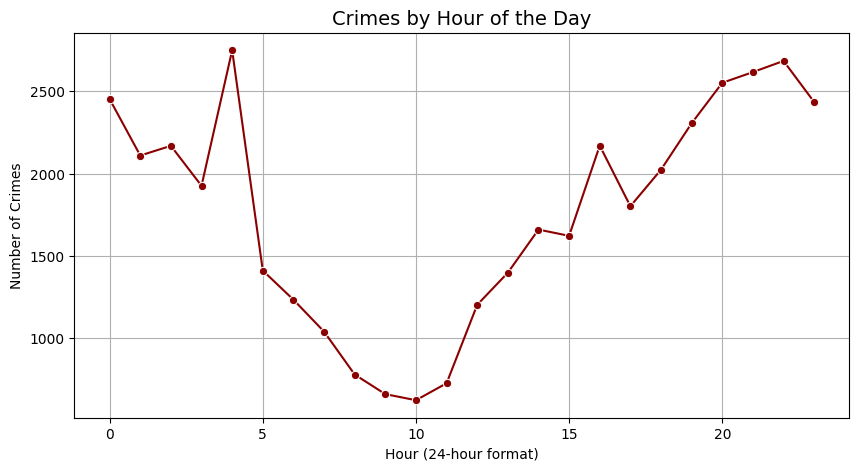

In [14]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Counts', data=hourly_counts, marker='o', color='darkred')
plt.title("Crimes by Hour of the Day", fontsize=14)
plt.xlabel("Hour (24-hour format)")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

The GeoPandas library provides convenient tools for reading shapefiles and accessing their properties.

Here's how you can load a shapefile and inspect its type and coordinate reference system (CRS):


In [15]:
neighborhoods = gpd.read_file("./City_of_Atlanta_Neighborhood_Statistical_Areas/Atlanta_Neighborhood.shp")

In [16]:
type(neighborhoods)

geopandas.geodataframe.GeoDataFrame

In [17]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
neighborhoods.head()

,OBJECTID,NPU,STATISTICA,POP2010,NEIGHBORHO,URL,A,pop,white,black,asian,other,hispanic,GlobalID,last_edite,Weight,Firestatio,Healthstat,geometry
0,1,NPU C,C04,2672,"Arden/Habersham, Argonne Forest, Peachtree Bat...",http://documents.atlantaregional.com/AtlantaPr...,"Arden/Habersham, Argonne Forest, Peachtree Bat...",2672,96.3,0.9,1.0,0.5,1.3,{6018B100-48DF-4B88-85B7-C4095D15897D},0000/00/00,6.0,5.0,1.0,"POLYGON ((-84.40728 33.84453, -84.40717 33.844..."
1,2,NPU B,B10,3736,"Peachtree Heights East, Peachtree Hills",http://documents.atlantaregional.com/AtlantaPr...,"Peachtree Heights East, Peachtree Hills",3736,86.6,5.9,2.0,1.8,3.7,{FA9A3ABB-FA59-43CD-92A8-B3BFCA21CB1D},0000/00/00,5.0,5.0,0.0,"POLYGON ((-84.37319 33.82102, -84.37293 33.820..."
2,3,NPU B,B01,4874,Peachtree Heights West,http://documents.atlantaregional.com/AtlantaPr...,Peachtree Heights West,4874,77.0,14.5,2.9,2.0,3.6,{405F0DA9-A4EE-4394-A4D9-B502065504DF},0000/00/00,5.0,5.0,0.0,"POLYGON ((-84.38462 33.84169, -84.38399 33.841..."
3,4,NPU B,B02,3372,"Buckhead Forest, South Tuxedo Park",http://documents.atlantaregional.com/AtlantaPr...,"Buckhead Forest, South Tuxedo Park",3372,77.5,9.0,3.5,2.0,8.1,{CF68D35A-64DD-4711-A9F3-A5CA932168AF},0000/00/00,9.0,5.0,4.0,"POLYGON ((-84.38064 33.83962, -84.38087 33.839..."
4,5,NPU A,A03,3423,"Chastain Park, Tuxedo Park",http://documents.atlantaregional.com/AtlantaPr...,"Chastain Park, Tuxedo Park",3423,93.8,0.7,2.6,1.1,1.8,{63D6A42F-7787-452A-BF77-56102A6C955F},0000/00/00,9.0,5.0,4.0,"POLYGON ((-84.40725 33.84936, -84.40725 33.849..."


The attribute `pop2010` represents the population count recorded in the 2010 Census.

Now let's visualize the population data from the 2010 Census using a choropleth map.


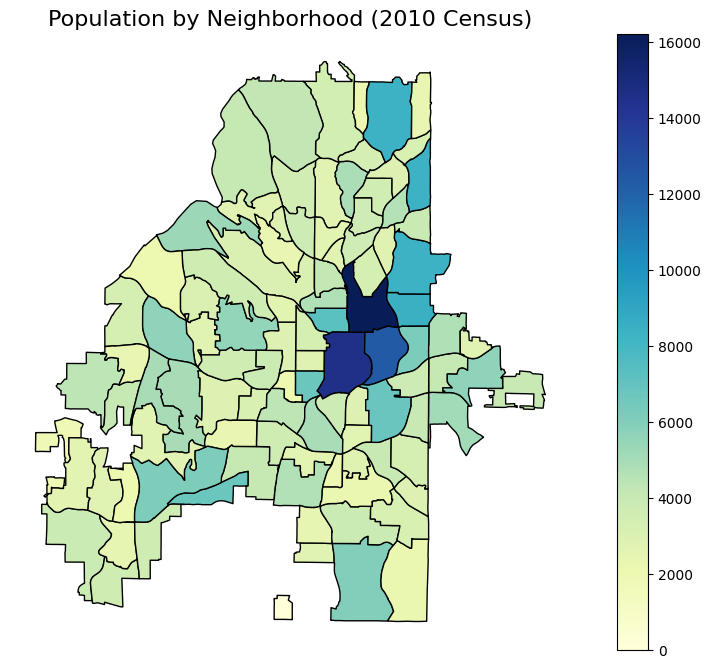

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
neighborhoods.plot(column="POP2010",  
                   cmap="YlGnBu", 
                   legend=True, 
                   edgecolor="black", 
                   ax=ax)
ax.set_title("Population by Neighborhood (2010 Census)", fontsize=16)
ax.axis("off")
plt.show()

## 2. Data Cleaning

- Remove rows with missing values(except for press_release and social_media).


In [20]:
#Remove rows with missing values except for 'press_release' and 'social_media'
columns_to_check = [col for col in crime_data.columns if col not in ['press_release', 'social_media']]
crime_data_cleaned = crime_data.dropna(subset=columns_to_check)

In [21]:
crime_data_cleaned.head()

,OBJECTID,report_number,report_Date,offense_start_date,offense_end_date,Day_of_the_week,Day_Number,Zone,Beat,location,...,long,lat,NhoodName,NPU,DISTRICT,UCR_Grouping,victim_count,GlobalID,geometry,Hour
0,1160956,230142167,"Sun, 15 Jan 2023 03:58:43 GMT",2023-01-15 01:20:00,"Sun, 15 Jan 2023 03:00:00 GMT",Saturday,7,1,111,3335 MARTIN L KING JR DR NW,...,-84.497429,33.754549,Adamsville,H,10.0,Part I,1.0,723e1e6c-5904-4528-99bf-32024721397b,POINT (-84.49743 33.75455),1.0
2,1160958,230150448,"Sun, 15 Jan 2023 10:34:18 GMT",2023-01-15 08:15:00,"Sun, 15 Jan 2023 09:23:00 GMT",Sunday,1,1,102,117 JOSEPH E LOWERY BLVD NW,...,-84.417334,33.758002,Vine City,L,3.0,Part I,1.0,b639b830-9859-4e25-af8a-8b800ab87dcf,POINT (-84.41733 33.758),8.0
3,1160959,230171812,"Wed, 18 Jan 2023 01:17:23 GMT",2023-01-17 23:31:00,"Wed, 18 Jan 2023 01:17:00 GMT",Tuesday,3,5,507,74 NORTHSIDE DR SW,...,-84.402518,33.752672,Castleberry Hill,M,3.0,Part I,1.0,29ebc0dc-6e1c-46b8-9483-5544d89d7d46,POINT (-84.40252 33.75267),23.0
5,1160962,230150699,"Sun, 15 Jan 2023 14:30:08 GMT",2023-01-15 14:34:00,"Sun, 15 Jan 2023 14:34:00 GMT",Sunday,1,4,410,1870 HONEYSUCKLE LN SW,...,-84.453439,33.706947,Campbellton Road,R,11.0,Part II,1.0,e2e12372-55fa-4888-9571-9165d342a21a,POINT (-84.45344 33.70695),14.0
6,1160963,230062194,"Sat, 07 Jan 2023 03:53:28 GMT",2023-01-07 01:36:00,"Sat, 07 Jan 2023 01:36:00 GMT",Friday,6,2,206,3040 PEACHTREE RD NW,...,-84.381903,33.839101,Peachtree Heights West,B,8.0,Part II,1.0,1210836f-c0f4-452d-95c6-999b31dc28e3,POINT (-84.3819 33.8391),1.0


Rows 2 and 5 are dropped. You can compare the current DataFrame with the previous printout and find which attributes contain NaN values.


After data cleaning, check the CRS of the dataset to ensure it matches the CRS of the shapefile.


In [22]:
crime_data_cleaned.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 3. Write a Python script create a point feature class for 2023 crime data.

- Make sure you use the correct geographic coordinates; after creating the feature class, you can open the generated shapefile in a GIS tool to confirm that the points are in the correct location.

- Make sure that the attribute table of the feature classes reflects the fields in the geojson files.


In [23]:
output_shapefile = r"./crime_data2023/crime_data2023.shp"  
crime_data_cleaned.to_file(output_shapefile, driver="ESRI Shapefile")

C:\Users\86177\AppData\Local\Temp\ipykernel_45608\3355178503.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  crime_data_cleaned.to_file(output_shapefile, driver="ESRI Shapefile")
c:\Users\86177\anaconda3\envs\DL\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'report_number' to 'report_num'
  ogr_write(
c:\Users\86177\anaconda3\envs\DL\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'report_Date' to 'report_Dat'
  ogr_write(
c:\Users\86177\anaconda3\envs\DL\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'offense_start_date' to 'offense_st'
  ogr_write(
c:\Users\86177\anaconda3\envs\DL\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Field offense_st create as date field, though DateTime requested.
  ogr_write(
c:\Users\86177\anaconda3\envs\DL\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized

💡 **Tip**: ESRI Shapefiles restrict field names to a maximum of 10 characters. Long field names are automatically truncated or laundered to fit this limit, which may result in less intuitive field names in the output shapefile. To avoid unexpected truncation, you can rename the columns in `crime_data_cleaned` to concise, descriptive names within the 10-character limit before exporting.


## 4. 🔔 **Question**: What does the distribution of crime look like across different neighborhoods?

- Use a spatial join to associate crime with a specific neighborhood.

- Count the number of crimes for each neighborhood.

- Identify most frequent crime in each neighborhood.

- Merge results with Neighborhood Shapefile.


### 4.1 Spatial Join


**Documentation**:

- 📖 [Spatial Joins in GeoPandas](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#spatial-joins)
- 📖 [GeoPandas `sjoin` Function Reference](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html)


In [24]:
#Use a spatial join to associate crimes with neighborhoods
crime_with_neighborhood = gpd.sjoin(crime_data_cleaned, neighborhoods, how="left", predicate="within")
print(crime_with_neighborhood.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 26839 entries, 0 to 38497
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OBJECTID_left         26839 non-null  int32         
 1   report_number         26839 non-null  object        
 2   report_Date           26839 non-null  object        
 3   offense_start_date    26839 non-null  datetime64[ns]
 4   offense_end_date      26839 non-null  object        
 5   Day_of_the_week       26839 non-null  object        
 6   Day_Number            26839 non-null  int32         
 7   Zone                  26839 non-null  int32         
 8   Beat                  26839 non-null  object        
 9   location              26839 non-null  object        
 10  location_type         26839 non-null  object        
 11  nibrs_code            26839 non-null  object        
 12  nibrs_code_name       26839 non-null  object        
 13  nibrs_crime_a

### 4.2 Count Crimes per Neighborhood

Group the data by neighborhood (e.g., by the neighborhood name or ID) then count the occurrences of crimes in each group.

**Documentation**:

- 📖 [Grouping and Aggregating in Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)


In [25]:
crime_counts = crime_with_neighborhood.groupby("NEIGHBORHO")["nibrs_code_name"].count().reset_index()
crime_counts.columns = ["neighborhood", "crime_count"]
print(crime_counts.head())

                                        neighborhood  crime_count
0                             Adair Park, Pittsburgh          465
1              Adams Park, Laurens Valley, Southwest          390
2                               Adamsville, Oakcliff          266
3                            Almond Park, Carey Park          188
4  Amal Heights, Betmar LaVilla, High Point, Joyland           93


### 4.3 Identify the Most Frequent Crime


In [26]:
# Group by neighborhood and count crimes
crime_by_type = crime_with_neighborhood.groupby(["NEIGHBORHO", "nibrs_code_name"])["nibrs_code_name"].count().reset_index(name="crime_count")
crime_by_type = crime_by_type.rename(columns={
    "NEIGHBORHO": "neighborhood",
    "nibrs_code_name": "crime_type"
})
print(crime_by_type.head())

             neighborhood                                  crime_type  \
0  Adair Park, Pittsburgh                          Aggravated Assault   
1  Adair Park, Pittsburgh                           All Other Larceny   
2  Adair Park, Pittsburgh                                       Arson   
3  Adair Park, Pittsburgh                Burglary/Breaking & Entering   
4  Adair Park, Pittsburgh  Credit Card/Automated Teller Machine Fraud   

   crime_count  
0           31  
1           28  
2            1  
3           28  
4            9  


In [27]:
# Sort by neighborhood and crime count
most_frequent_crime = (
    crime_by_type.sort_values(["neighborhood", "crime_count"], ascending=[True, False])
    .drop_duplicates("neighborhood")
)
most_frequent_crime.head()

,neighborhood,crime_type,crime_count
15,"Adair Park, Pittsburgh",Motor Vehicle Theft,89
43,"Adams Park, Laurens Valley, Southwest",Motor Vehicle Theft,82
66,"Adamsville, Oakcliff",Motor Vehicle Theft,57
95,"Almond Park, Carey Park",Simple Assault,40
105,"Amal Heights, Betmar LaVilla, High Point, Joyland",Destruction/Damage/Vandalism of Property,18


### 4.4 Merge Results with Neighborhood Shapefile


**Documentation**:

- 📖 [Merging DataFrames in GeoPandas](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#attribute-joins)


In [28]:
neighborhoods = neighborhoods.merge(
    crime_counts, left_on="NEIGHBORHO", right_on="neighborhood", how="left"
)

In [29]:
neighborhoods.head()

,OBJECTID,NPU,STATISTICA,POP2010,NEIGHBORHO,URL,A,pop,white,black,...,other,hispanic,GlobalID,last_edite,Weight,Firestatio,Healthstat,geometry,neighborhood,crime_count
0,1,NPU C,C04,2672,"Arden/Habersham, Argonne Forest, Peachtree Bat...",http://documents.atlantaregional.com/AtlantaPr...,"Arden/Habersham, Argonne Forest, Peachtree Bat...",2672,96.3,0.9,...,0.5,1.3,{6018B100-48DF-4B88-85B7-C4095D15897D},0000/00/00,6.0,5.0,1.0,"POLYGON ((-84.40728 33.84453, -84.40717 33.844...","Arden/Habersham, Argonne Forest, Peachtree Bat...",39.0
1,2,NPU B,B10,3736,"Peachtree Heights East, Peachtree Hills",http://documents.atlantaregional.com/AtlantaPr...,"Peachtree Heights East, Peachtree Hills",3736,86.6,5.9,...,1.8,3.7,{FA9A3ABB-FA59-43CD-92A8-B3BFCA21CB1D},0000/00/00,5.0,5.0,0.0,"POLYGON ((-84.37319 33.82102, -84.37293 33.820...","Peachtree Heights East, Peachtree Hills",78.0
2,3,NPU B,B01,4874,Peachtree Heights West,http://documents.atlantaregional.com/AtlantaPr...,Peachtree Heights West,4874,77.0,14.5,...,2.0,3.6,{405F0DA9-A4EE-4394-A4D9-B502065504DF},0000/00/00,5.0,5.0,0.0,"POLYGON ((-84.38462 33.84169, -84.38399 33.841...",Peachtree Heights West,129.0
3,4,NPU B,B02,3372,"Buckhead Forest, South Tuxedo Park",http://documents.atlantaregional.com/AtlantaPr...,"Buckhead Forest, South Tuxedo Park",3372,77.5,9.0,...,2.0,8.1,{CF68D35A-64DD-4711-A9F3-A5CA932168AF},0000/00/00,9.0,5.0,4.0,"POLYGON ((-84.38064 33.83962, -84.38087 33.839...","Buckhead Forest, South Tuxedo Park",371.0
4,5,NPU A,A03,3423,"Chastain Park, Tuxedo Park",http://documents.atlantaregional.com/AtlantaPr...,"Chastain Park, Tuxedo Park",3423,93.8,0.7,...,1.1,1.8,{63D6A42F-7787-452A-BF77-56102A6C955F},0000/00/00,9.0,5.0,4.0,"POLYGON ((-84.40725 33.84936, -84.40725 33.849...","Chastain Park, Tuxedo Park",72.0


## 5. 🥊 Challenge : Data Visualization

- Create a choropleth map showing the crime rates for each neighborhood.


Calculate the crime rates for each neighborhood by dividing the total number of reported crimes of 2023 by the neighborhood population. Express the result as crimes per 1,000 people(1 point).


Merge crime rates with the Atlanta neighborhood shapefile(1 point).


Generate a choropleth map displaying the crime rates for each neighborhood using the `cmap="OrRd"` color palette(1 point).


(-84.56415620186965, -84.27630922082591, 33.63586366126991, 33.89878021611902)

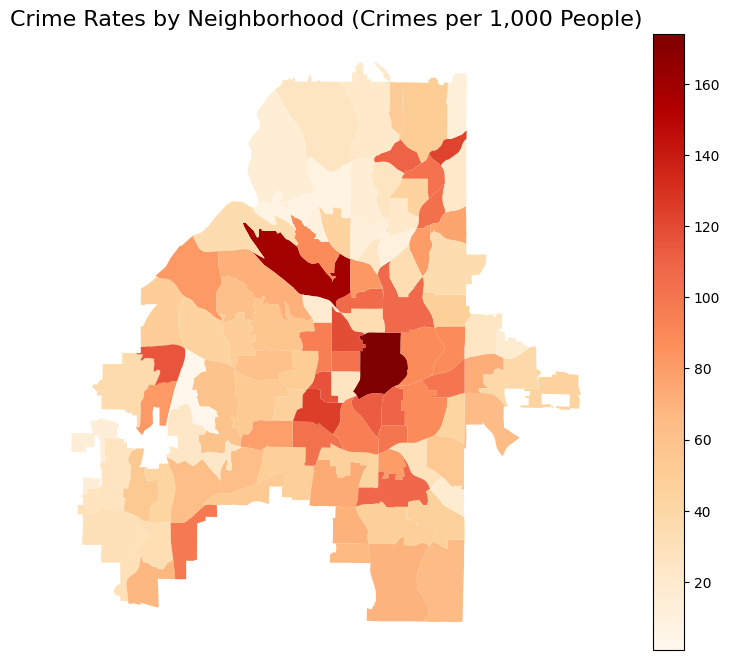

## 6. Analyze geolocation clusters for daytime and nighttime, focusing on severe crimes.

- Filter by crime type and time of day and combine latitude and longitude data to create a dataset suitable for clustering.

- Group crimes into clusters using Python libraries(e.g., scikit-learn for K-Means or DBSCAN). Please refer to the following packages:\
  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html\
  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

- Visualize the results on map.


### 6.1 Preparation


In [30]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

We concentrate on crimes classified as severe in this section. While the definition of "severe" can vary, we adopt the following categories for this analysis:


In [31]:
severe_crimes = [
    'Murder & Nonnegligent Manslaughter',
    'Rape',
    'Robbery',
    'Aggravated Assault',
    'Kidnapping/Abduction',
    'Sodomy',
    'Statutory Rape',
    'Sexual Assault With An Object',
    'Human Trafficking, Commercial Sex Acts'
]

**Function: `day_night_label`** labels crimes based on whether they occurred during the day or night:

- Day: Hours between 7 AM and 6 PM.
- Night: Hours outside this range.


In [32]:
def day_night_label(hour):
    if 7 <= hour < 18:
        return "Day"
    else:
        return "Night"

crime_data_cleaned.loc[:, "day_night"] = crime_data_cleaned["Hour"].apply(day_night_label)

c:\Users\86177\anaconda3\envs\DL\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


**Function: `severity_label`** categorizes crimes into Severe or Other:

- Severe: Crimes listed in the predefined `severe_crimes` list.
- Other: All other crimes.


In [33]:
def severity_label(crime_type):
    if crime_type in severe_crimes:
        return "Severe"
    else:
        return "Other"
    
crime_data_cleaned.loc[:, "severity_label"] = crime_data_cleaned["nibrs_code_name"].apply(severity_label)

c:\Users\86177\anaconda3\envs\DL\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Extract severe crimes that occurred during the day:


In [34]:
df = crime_data_cleaned[(crime_data_cleaned["day_night"] == "Day") & (crime_data_cleaned["severity_label"] == "Severe")].copy()

Extract the latitude and longitude as a 2D array for clustering:


In [35]:
# Extract coordinates as a 2D array
X = df[["lat", "long"]].values

### 6.2 K-Means Clustering


Set the number of clusters (`k`) and apply the K-Means algorithm:


In [36]:
k = 3
kmeans_3 = KMeans(n_clusters=k, random_state=42)

# Fit and predict cluster labels
labels_3 = kmeans_3.fit_predict(X)

In [37]:
labels_3[:10]

array([1, 1, 2, 1, 0, 1, 1, 1, 0, 0])

In [38]:
df["cluster_3"] = labels_3

Plot the clusters using a scatterplot:


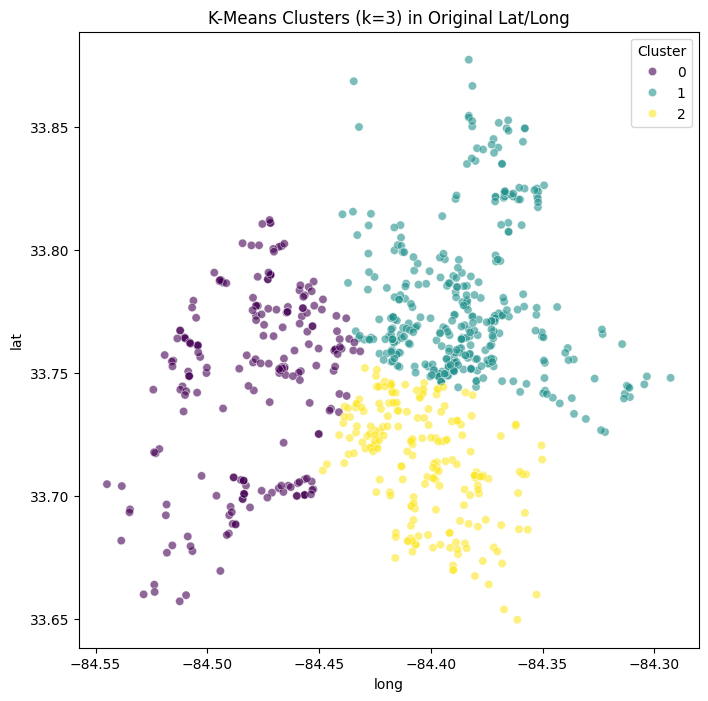

In [39]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    data=df, 
    x='long', 
    y='lat', 
    hue='cluster_3', 
    palette='viridis', 
    alpha=0.6
)
plt.title(f"K-Means Clusters (k={k}) in Original Lat/Long")
plt.legend(title="Cluster")
plt.show()

The clustering results may not be satisfactory. To improve the quality of clustering, you will determine the optimal number of clusters (`k`) using the Elbow Method and then perform clustering again.


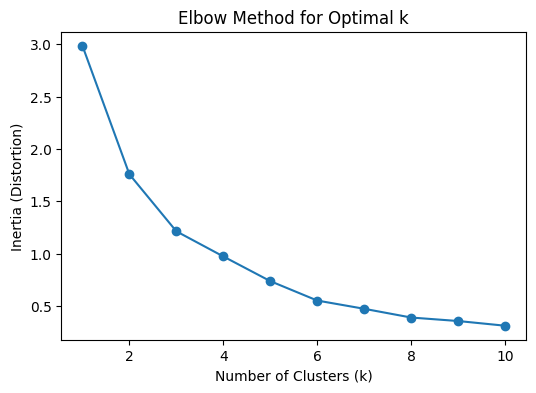

In [40]:
distortions = []
K_range = range(1, 11)

for k_val in K_range:
    km_test = KMeans(n_clusters=k_val, random_state=42)
    km_test.fit(X)
    distortions.append(km_test.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, distortions, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Distortion)")
plt.show()

🥊 **Challege**: Perform clustering to group crimes using the optimal K-value (1 point) and visualize the results on a map (1 point).


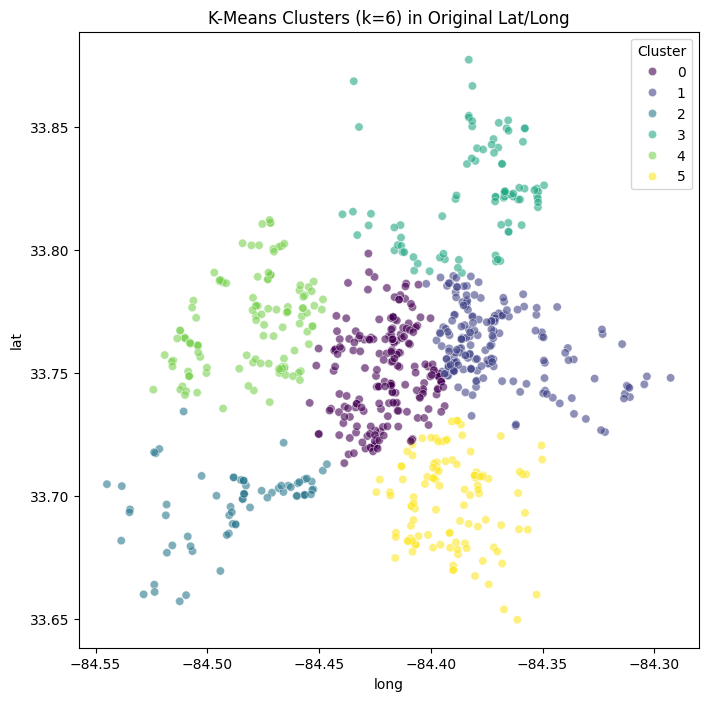

### 6.3 DBSCAN Clustering


Density-Based Spatial Clustering of Applications(DBSCAN) is ideal for datasets with:

- Noise or outliers: Handles noisy datasets effectively.
- Arbitrary-shaped clusters: Can detect non-spherical clusters, unlike K-Means which assumes spherical shapes.

Key Parameters

`eps`

- Defines the neighborhood radius around a data point.
- If another point lies within this radius, it is considered a neighbor.

`min_samples`

- The minimum number of points required to form a dense region (a cluster).


💡 **Tip**: You can experiment with these parameters to observe how they affect the clustering results.


In [41]:
# DBSCAN parameters
eps_val = 0.007       # ~ 0.779km if lat ~ 33 deg
min_samples_val = 10 # Need at least 10 points in that radius

# Create and fit DBSCAN
dbscan_model = DBSCAN(eps=eps_val, min_samples=min_samples_val)
labels = dbscan_model.fit_predict(X)

df["cluster"] = labels

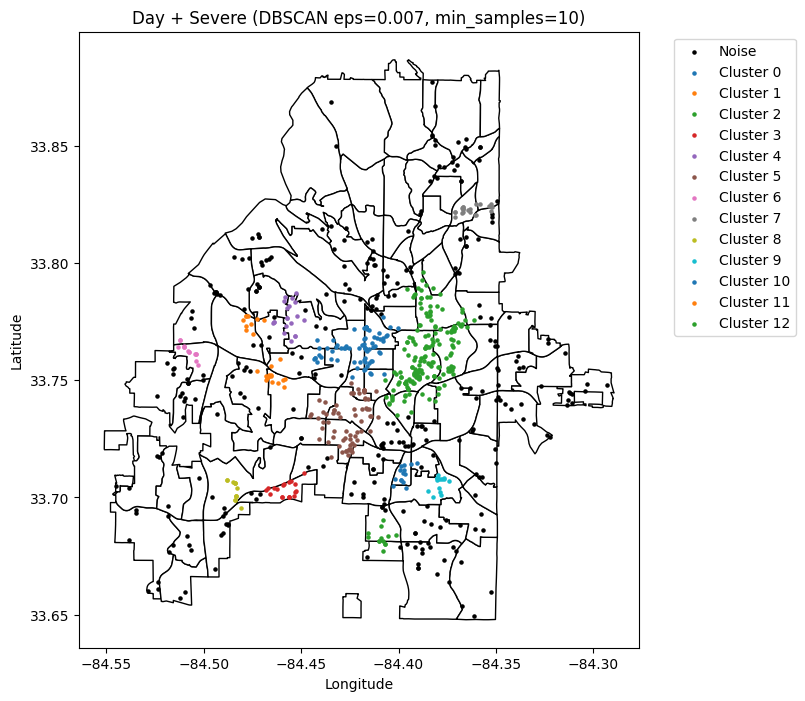

In [42]:
unique_labels = np.unique(labels)

fig, ax = plt.subplots(figsize=(12, 8))

neighborhoods.plot(ax=ax, color="white", edgecolor="black")

for lbl in unique_labels:
    mask = (labels == lbl)
    if lbl == -1:
        # noise
        plt.scatter(
            df.loc[mask, "long"],
            df.loc[mask, "lat"],
            c="k", s=5, label="Noise"
        )
    else:
        plt.scatter(
            df.loc[mask, "long"],
            df.loc[mask, "lat"],
            s=5, label=f"Cluster {lbl}"
        )

plt.title(f"Day + Severe (DBSCAN eps={eps_val}, min_samples={min_samples_val})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [43]:
df = crime_data_cleaned[(crime_data_cleaned["day_night"] == "Night") & (crime_data_cleaned["severity_label"] == "Severe")].copy()

In [44]:
# DBSCAN parameters
eps_val = 0.005       
min_samples_val = 10 

X = df[["lat", "long"]].values

dbscan_model = DBSCAN(eps=eps_val, min_samples=min_samples_val)
labels = dbscan_model.fit_predict(X)

df["cluster"] = labels

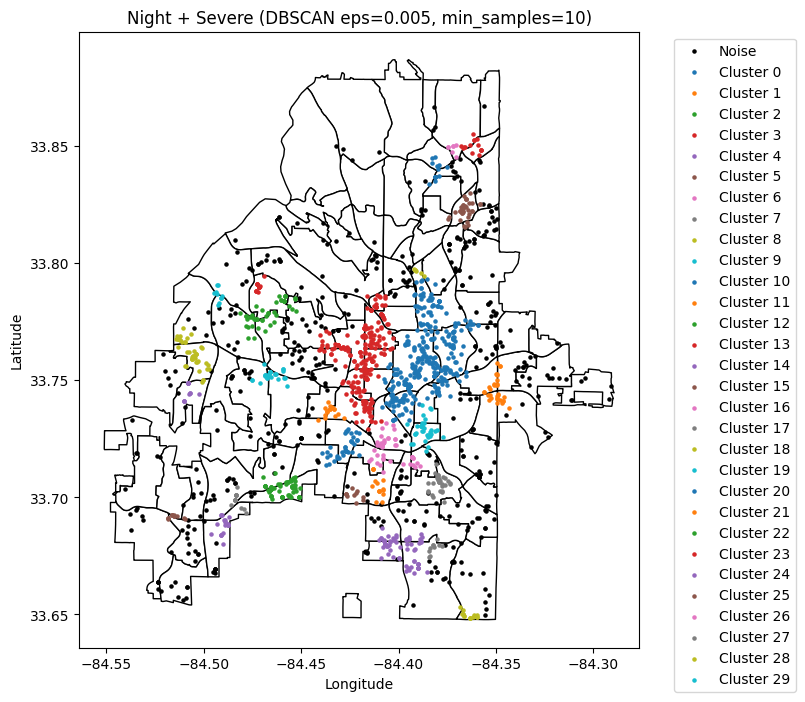

In [45]:
unique_labels = np.unique(labels)

fig, ax = plt.subplots(figsize=(12, 8))

neighborhoods.plot(ax=ax, color="white", edgecolor="black")

for lbl in unique_labels:
    mask = (labels == lbl)
    if lbl == -1:
        # noise
        plt.scatter(
            df.loc[mask, "long"],
            df.loc[mask, "lat"],
            c="k", s=5, label="Noise"
        )
    else:
        plt.scatter(
            df.loc[mask, "long"],
            df.loc[mask, "lat"],
            s=5, label=f"Cluster {lbl}"
        )

plt.title(f"Night + Severe (DBSCAN eps={eps_val}, min_samples={min_samples_val})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()